### MNIST digit recognizer

In [26]:
import pandas as pd
import tensorflow as tf


In [41]:
mnist_train= pd.read_csv('train.csv')
mnist_test = pd.read_csv('test.csv')

In [28]:
mnist.shape

(42000, 785)

In [29]:
mnist.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [30]:
import matplotlib.pyplot as plt

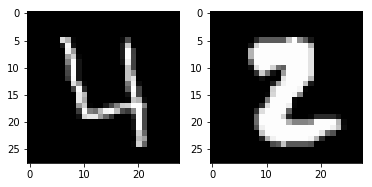

In [31]:
plt.subplot2grid(shape=(1,2),loc=(0,0))
plt.imshow(mnist.values[3][1:785].reshape(28,28),cmap='gist_gray')
plt.subplot2grid(shape=(1,2),loc=(0,1))
plt.imshow(mnist.values[16][1:785].reshape(28,28),cmap='gist_gray')

In [32]:
from sklearn.model_selection import train_test_split

In [44]:
X_data = mnist.drop("label",axis =1)

In [76]:
y_data = mnist['label']
y_data.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [47]:
X_train,X_test,y_train,y_test = train_test_split(X_data,y_data, test_size =0.3,random_state =13)

In [48]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape,sep='\n')

(29400, 784)
(29400,)
(12600, 784)
(12600,)


In [100]:
y_train=tf.one_hot(y_train,10)

In [119]:
with tf.Session() as sess:
    y_train= sess.run(y_train)

In [120]:
y_train

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [121]:
x = tf.placeholder(tf.float32,shape =[None,784])

In [232]:
W = tf.Variable(tf.zeros([784,10]))
#W1 =tf.Variable(tf.random_uniform([784,10]))
b = tf.Variable(tf.zeros([10]))

In [233]:
y = tf.matmul(x,W)+b

In [234]:
y_true = tf.placeholder(tf.float32)

In [235]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_true,logits=y))

In [236]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5)
train = optimizer.minimize(cross_entropy)

In [237]:
init = tf.global_variables_initializer()

In [243]:
epoch =20
batch_size =100

In [244]:
batch_num = int(X_train.shape[0]/batch_size)

In [245]:
batch_num

294

In [246]:
import time

In [247]:
with tf.Session() as sess:
    sess.run(init)
    
    start = time.time()
    for i in range (epoch):
        for j in range(batch_num):
            minibatch_x = X_train[j*batch_size:(j+1)*batch_size]
            minibatch_y = y_train[j*batch_size:(j+1)*batch_size]
            #print(minibatch_y.shape)
            sess.run(train,feed_dict={x:minibatch_x,y_true:minibatch_y})
    end = time.time()
    print("Total time taken is ",end -start, "s")
    #EVALUATING 
    y_pred = tf.equal(tf.argmax(y,axis =1),tf.argmax(y_true,axis =1))
    
    # converting True, False to 1.0 and 0.0
    acc = tf.reduce_mean(tf.cast(y_pred,tf.float32))
    print(sess.run(acc,feed_dict={x:X_train,y_true:y_train}))

Total time taken is  8.36713457107544 s
0.9015306


In [ ]:
pred = 